In [30]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model

In [86]:
import json
from operator import itemgetter

owdata = []

def get_data( index ) :
    
    with open('data{}_{}.json'.format( index*50, index*50+50 )) as data_file:    
        data = json.load( data_file )

    for player in data:
        for server in player:

            if server in ['eu', 'us', 'kr'] and player[server] and player[server]['stats']['competitive'] and player[server]['stats']['competitive']['overall_stats']['comprank'] and player[server]['stats']['competitive']['overall_stats']['comprank'] > 1000 and player[server]['stats']['competitive']['overall_stats']['win_rate'] > 10:

                owdata.append( (player[server]['stats']['competitive']['overall_stats']['comprank'],
                                player[server]['stats']['competitive']['overall_stats']['win_rate']) )
            
for i in range(10):
    get_data( i )
    
print( len(owdata) )

902


In [92]:
# Use only one feature
win_rates = [ d[0] for d in owdata]
skill_ratings = [ d[1] for d in owdata]

# Split the data into training/testing sets
diabetes_X_train = skill_ratings[:-20]
diabetes_X_test = skill_ratings[-20:]

# Split the targets into training/testing sets
diabetes_y_train = owdata[:-20]
diabetes_y_test = owdata[-20:]

In [91]:
# Create linear regression object
regr = linear_model.LinearRegression()

# help( regr.fit )

# print( win_rates )

# Train the model using the training sets
# regr.fit( skill_ratings, win_rates[:] )

In [5]:
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % np.mean((regr.predict(diabetes_X_test) - diabetes_y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(diabetes_X_test, diabetes_y_test))

Coefficients: 
 [ 938.23786125]
Mean squared error: 2548.07
Variance score: 0.47


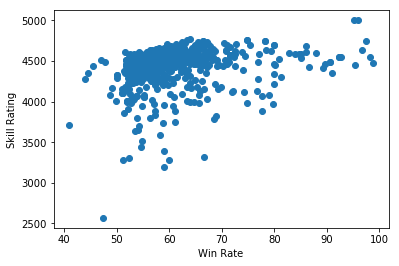

In [98]:
# Plot outputs
fig, ax = plt.subplots()

ax.scatter( skill_ratings, win_rates )
# ax.plot( diabetes_X_test, regr.predict(diabetes_X_test), color='black', linewidth=3)

ax.set_xlabel('Win Rate')
ax.set_ylabel('Skill Rating')

plt.show()